## Import Library dan Setup Lingkungan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import model-model dari scikit-learn dan lightgbm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Memuat Data

In [2]:
# Muat data
train_df = pd.read_csv('dataset/data_iph_training.csv')
test_df = pd.read_csv('dataset/data_iph_testing.csv')
full_df = pd.read_csv('data_iph_modeling.csv')

# Pisahkan fitur (X) dan target (y)
# Asumsi target adalah 'Indikator_Harga' dan sisanya adalah fitur
FEATURE_COLS = ['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'MA_3', 'MA_7']
TARGET_COL = 'Indikator_Harga'

X_train = train_df[FEATURE_COLS].values
y_train = train_df[TARGET_COL]

X_test = test_df[FEATURE_COLS].values
y_test = test_df[TARGET_COL]

print("Data berhasil dimuat dan dipisahkan.")
print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")

Data berhasil dimuat dan dipisahkan.
Jumlah data training: 89
Jumlah data testing: 23


## Modeling

In [4]:
# Siapkan model-model yang akan diuji
models = {
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=4, min_samples_leaf=3,  random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, num_leaves=15, reg_alpha=0.1, reg_lambda=0.1, random_state=42)
}

# Simpan hasil performa
results = []

print("\nMemulai eksperimen model...")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append({'Model': name, 'MAE': mae, 'RMSE': rmse})


Memulai eksperimen model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 89, number of used features: 6
[LightGBM] [Info] Start training from score 0.050719
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

c:\ProgramData\anaconda3\envs\tf_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Evaluasi Metrik

In [5]:
# Tampilkan hasil dalam bentuk tabel
results_df = pd.DataFrame(results)
print("\n--- Hasil Perbandingan Model ---")
print(results_df)


--- Hasil Perbandingan Model ---
           Model       MAE      RMSE
0            KNN  1.125513  1.490438
1  Random Forest  0.967375  1.339674
2       LightGBM  1.151359  1.594883


### Latih dan Visualisasi

--- Memproses Model: KNN ---


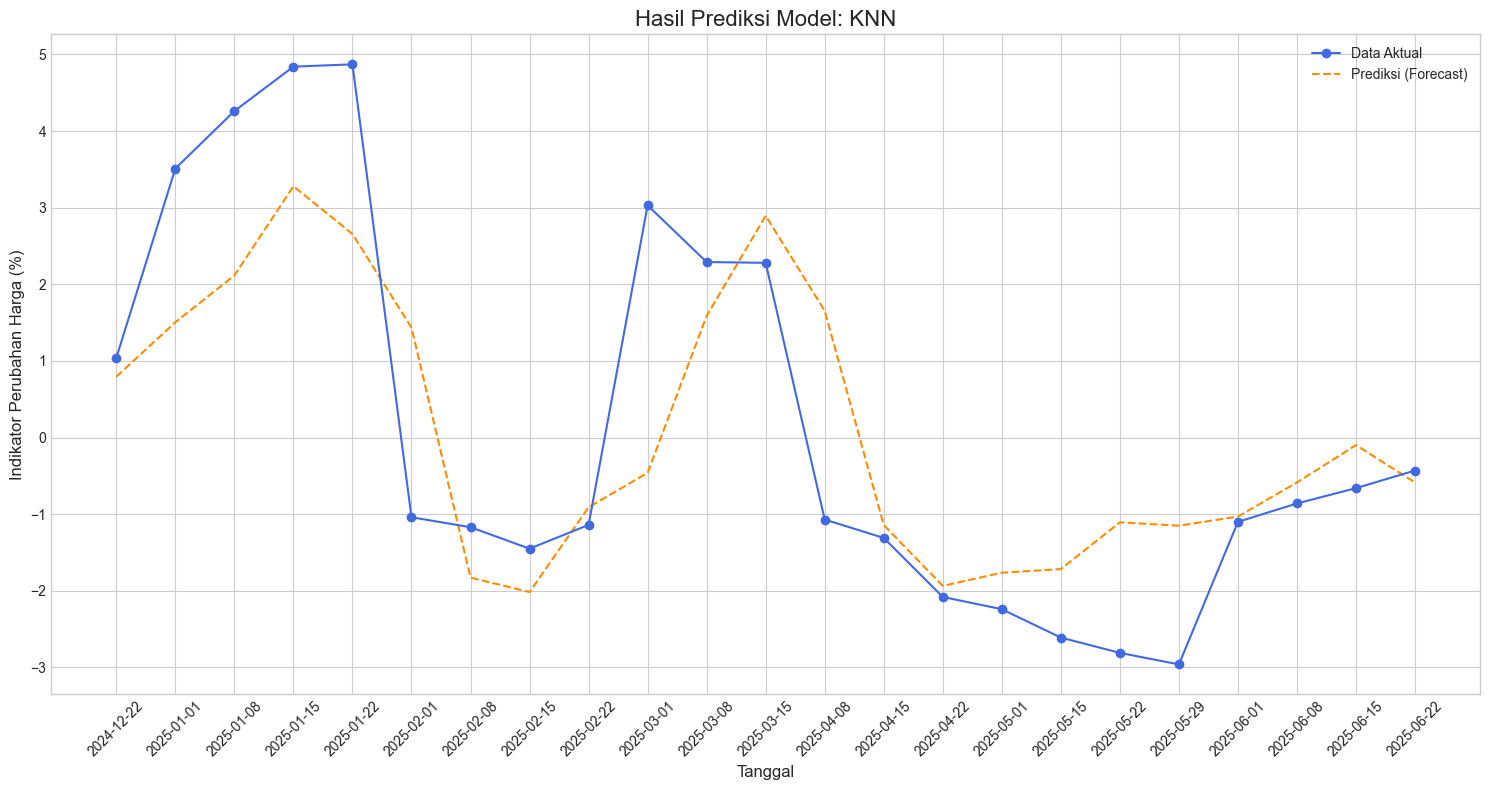

--- Memproses Model: Random Forest ---


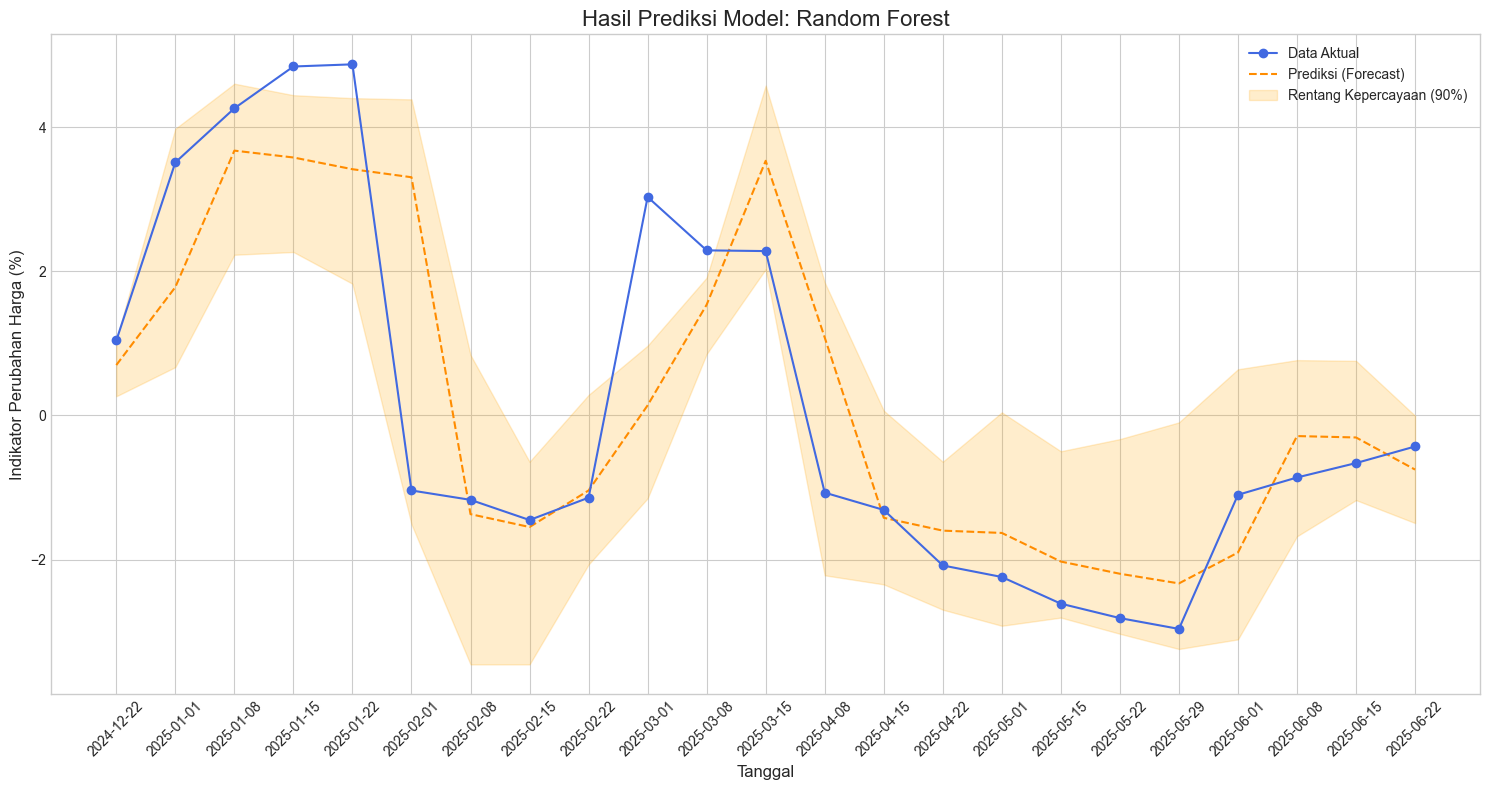

--- Memproses Model: LightGBM ---
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 186
[LightGBM] [Info] Number of data points in the train set: 89, number of used features: 6
[LightGBM] [Info] Start training from score 0.140000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

c:\ProgramData\anaconda3\envs\tf_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tf_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\ProgramData\anaconda3\envs\tf_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


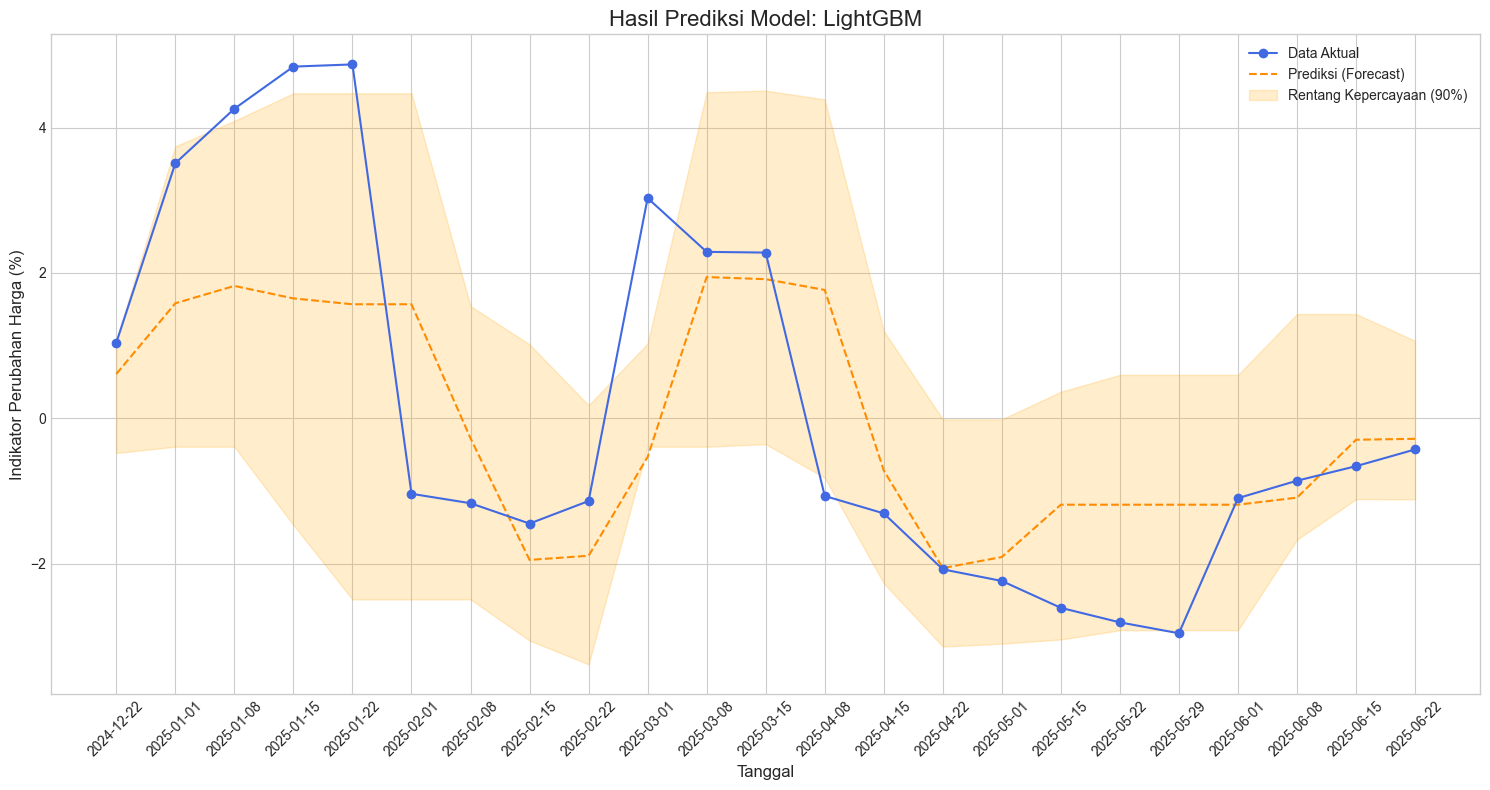

In [8]:
# Loop melalui setiap model untuk membuat prediksi dan visualisasi
for name, model in models.items():
    print(f"--- Memproses Model: {name} ---")

    # Logika berbeda untuk setiap model untuk mendapatkan rentang kepercayaan
    if name == 'KNN':
        # Latih model
        model.fit(X_train, y_train)
        # Prediksi utama
        y_pred_median = model.predict(X_test)
        
        y_pred_lower = y_pred_median
        y_pred_upper = y_pred_median

    elif name == 'Random Forest':
        # Latih model
        model.fit(X_train, y_train)
        
        # Dapatkan prediksi dari setiap pohon di dalam "hutan"
        individual_tree_preds = [tree.predict(X_test) for tree in model.estimators_]
        
        # Hitung persentil dari semua prediksi pohon
        y_pred_lower = np.percentile(individual_tree_preds, 5, axis=0)
        y_pred_median = np.percentile(individual_tree_preds, 50, axis=0)
        y_pred_upper = np.percentile(individual_tree_preds, 95, axis=0)
        
    elif name == 'LightGBM':
        # Dapatkan parameter asli dari model
        params = model.get_params()

        # Hapus parameter 'objective' yang konflik agar tidak duplikat
        params.pop('objective', None)

        # Gunakan Quantile Regression dengan 'params' yang sudah bersih
        lgbm_median = LGBMRegressor(objective='quantile', alpha=0.5, **params).fit(X_train, y_train)
        lgbm_lower = LGBMRegressor(objective='quantile', alpha=0.05, **params).fit(X_train, y_train)
        lgbm_upper = LGBMRegressor(objective='quantile', alpha=0.95, **params).fit(X_train, y_train)
        
        # Dapatkan prediksi dari setiap model quantile
        y_pred_median = lgbm_median.predict(X_test)
        y_pred_lower = lgbm_lower.predict(X_test)
        y_pred_upper = lgbm_upper.predict(X_test)

    # --- Bagian Visualisasi ---
    plot_index = test_df['Tanggal']
    
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(15, 8))
    
    plt.plot(plot_index, y_test, label='Data Aktual', color='royalblue', marker='o', zorder=5)
    plt.plot(plot_index, y_pred_median, label='Prediksi (Forecast)', color='darkorange', linestyle='--', zorder=4)
    
    # Hanya tampilkan rentang kepercayaan jika bukan model KNN
    if name != 'KNN':
        plt.fill_between(plot_index, y_pred_lower, y_pred_upper, color='orange', alpha=0.2, label='Rentang Kepercayaan (90%)')
    
    plt.title(f'Hasil Prediksi Model: {name}', fontsize=16)
    plt.xlabel('Tanggal', fontsize=12)
    plt.ylabel('Indikator Perubahan Harga (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
